In [136]:
from fireTS.models import DirectAutoRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

x = np.random.randn(100, 1)
y = np.random.randn(100)
mdl = DirectAutoRegressor(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1], pred_step=3)
mdl.fit(x, y)
ypred = mdl.predict(x, y)

In [137]:
from fireTS.models import NARX
from sklearn.ensemble import RandomForestRegressor
import numpy as np

x = np.random.randn(100, 1)
y = np.random.randn(100)
mdl = NARX(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1])
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)

In [138]:
from fireTS.models import NARX
from sklearn.ensemble import RandomForestRegressor
import numpy as np

x = np.random.randn(100, 1)
y = np.random.randn(100)

# DirectAutoRegressor can do grid search as well
mdl = NARX(RandomForestRegressor(), auto_order=2, exog_order=[2], exog_delay=[1])

# Grid search
para_grid = {'n_estimators': [10, 30, 100]}
mdl.grid_search(x, y, para_grid, verbose=2)

# Best hyper-parameters are set after grid search, print the model to see the difference
print(mdl)

# Fit the model and make the prediction
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] .................................. n_estimators=30, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] .............

In [178]:
from fireTS.models import NARX
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

#Predicting sine curve with noise using NARX
x = np.arange(0,100,1).reshape(100,-1)
noise = np.random.normal(0,1,100).reshape(100,-1)
y = np.add(np.sin(x)*6, noise).reshape(100)

#uncomment to test prediction of sine without noise
# y = (np.sin(x) * 6).reshape(100)

# DirectAutoRegressor can do grid search as well
mdl = NARX(MLPRegressor(max_iter=20000,learning_rate_init = 0.001,tol=0.00001), auto_order=2, exog_order=[2], exog_delay=[1])

# Grid search
para_grid = {'hidden_layer_sizes': [(5,15),(10),(5,5)]}
mdl.grid_search(x, y, para_grid, verbose=2)

# Best hyper-parameters are set after grid search, print the model to see the difference
print(mdl)

# Fit the model and make the prediction
mdl.fit(x, y)
ypred = mdl.predict(x, y, step=3)
r2score = mdl.score(x,y,step=3)
print("Score: " + str(r2score))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] hidden_layer_sizes=(5, 15) ......................................
[CV] ....................... hidden_layer_sizes=(5, 15), total=   0.0s
[CV] hidden_layer_sizes=(5, 15) ......................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] ....................... hidden_layer_sizes=(5, 15), total=   0.1s
[CV] hidden_layer_sizes=(5, 15) ......................................
[CV] ....................... hidden_layer_sizes=(5, 15), total=   0.3s
[CV] hidden_layer_sizes=10 ...........................................
[CV] ............................ hidden_layer_sizes=10, total=   0.2s
[CV] hidden_layer_sizes=10 ...........................................
[CV] ............................ hidden_layer_sizes=10, total=   0.2s
[CV] hidden_layer_sizes=10 ...........................................
[CV] ............................ hidden_layer_sizes=10, total=   0.3s
[CV] hidd

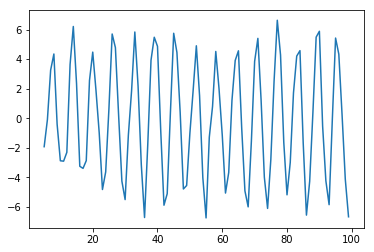

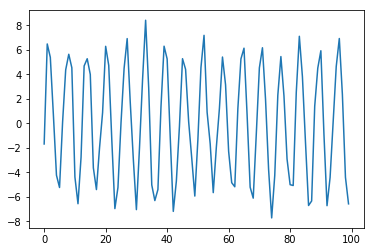

In [179]:
#predicted plot
plt.plot(ypred)
plt.show()
#actual plot
plt.plot(y)
plt.show()

In [180]:
import joblib
#saving model
joblib.dump(mdl,'mdl.joblib')
#loading model
mdl_loaded = joblib.load('mdl.joblib')

ypred_loaded = mdl.predict(x, y, step=3)

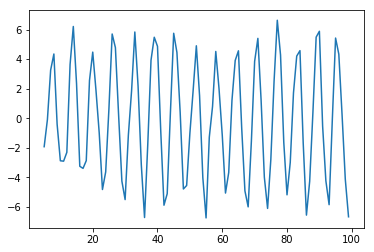

In [181]:
#predicted plot
plt.plot(ypred_loaded)
plt.show()